In [7]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization.Interval2d import Interval2d
from interClusLib.visualization.Interval3d import Interval3d

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         43.360256        52.154596        40.567327        74.021339   
1         72.581065        73.151768        58.564729        71.747085   
2         82.490907        83.663615        68.661272        74.664906   
3         36.418301        44.835791        22.678843        88.792668   
4         44.372648        99.956766        55.113681        92.255924   
5         29.401884        98.363074        17.095610        42.101936   
6         40.020672        71.491567        64.327473        78.672714   
7         66.852184        87.034250        18.682256        80.089899   
8         13.519659        48.265591        10.791549        45.602191   
9         26.544077        82.872092         8.304839        14.053709   
10         2.549633        10.828509         5.206513        63.126

In [8]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.data_structure.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)
30


30
[[1.         0.19998556 0.12712005 0.27571765 0.27831384 0.05149467
  0.2769065  0.23390003 0.06886479 0.18482515 0.20466783 0.24131054
  0.06071536 0.22514348 0.21642737 0.21612473 0.21928869 0.38734763
  0.29229098 0.25338997 0.04828912 0.05752411 0.09996444 0.08694417
  0.         0.20796798 0.2287857  0.15348108 0.43446122 0.14603142]
 [0.19998556 1.         0.37829229 0.13216085 0.36766806 0.0145742
  0.16181053 0.38470306 0.15426138 0.22548625 0.06155028 0.2962895
  0.17220709 0.27871321 0.07488492 0.47971935 0.15337439 0.40228033
  0.08874549 0.23058518 0.0324371  0.12347168 0.10411162 0.12588156
  0.13002079 0.08066545 0.016654   0.04460876 0.19349732 0.17920333]
 [0.12712005 0.37829229 1.         0.09223635 0.30833434 0.0168131
  0.17737033 0.33843116 0.14550142 0.226267   0.03650284 0.26477621
  0.17705258 0.21715338 0.08139376 0.38282614 0.1131851  0.29684248
  0.03764111 0.16878738 0.03407863 0.09326384 0.12618212 0.09760095
  0.14958984 0.0472001  0.02421156 0.         

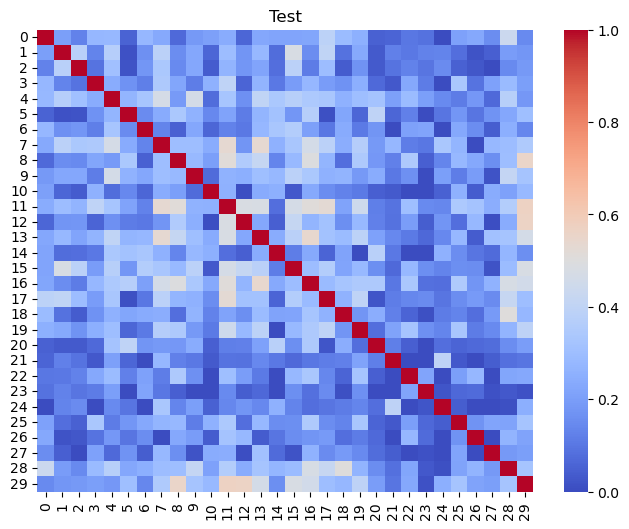

In [9]:
print(random_data.get_intervals().shape[0])
distance_matrix = IntervalMetrics.pairwise_similarity(random_data.get_intervals(),"jaccard")

print(distance_matrix)

plt.figure(figsize=(8, 6))
HeatMap.draw_heat_map(distance_matrix, ax = None ,cmap = 'coolwarm', annot=False, cbar=True)
plt.title("Test")
plt.show()

In [10]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

print(model.labels_)

[1 1 1 1 1 1 1 1 3 1 3 3 3 1 1 1 1 3 0 2 0 0 2 2 0 3 2 0 1 3]


In [11]:
def plot_intervals_3D(intervals, labels=None):
    fig= plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    Interval3d.draw_3d_interval_cubes(ax, intervals, labels)

    xs = intervals[:, 0, :].ravel()  # x_lower, x_upper
    ys = intervals[:, 1, :].ravel()  # y_lower, y_upper
    zs = intervals[:, 2, :].ravel()  # z_lower, z_upper

    x_min, x_max = xs.min() - 5, xs.max() + 5
    y_min, y_max = ys.min() - 5, ys.max() + 5
    z_min, z_max = zs.min() - 5, zs.max() + 5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title("3D")

    plt.show()

def plot_intervals_as_squares(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6,6))
    Interval2d.draw_interval_squares(ax, intervals, labels)

    min_val = intervals.min() - 1
    max_val = intervals.max() + 1
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("Coordinate X (lower →)")
    ax.set_ylabel("Coordinate Y (lower →)")
    ax.set_title("1D Intervals as Squares")
    plt.show()

def plot_2d_intervals(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    Interval2d.draw_interval_rectangles(ax, intervals, labels=labels)
    
    # 根据 intervals 范围调整坐标
    x_vals = intervals[:, 0, :].ravel()  # 所有 x_lower, x_upper
    y_vals = intervals[:, 1, :].ravel()  # 所有 y_lower, y_upper
    x_min, x_max = x_vals.min() - 1, x_vals.max() + 1
    y_min, y_max = y_vals.min() - 1, y_vals.max() + 1
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # 让坐标系的 x,y 单位看起来相等
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("X dimension")
    ax.set_ylabel("Y dimension")
    ax.set_title("2D Interval Rectangles")
    plt.show()


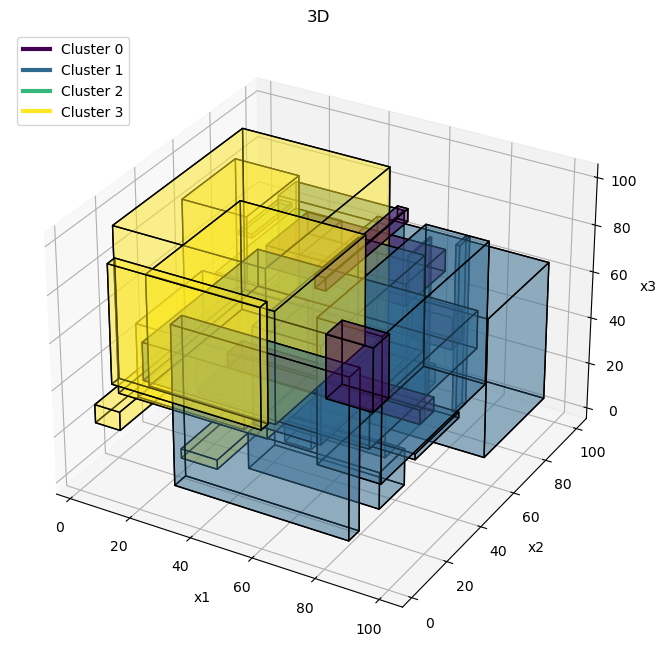

In [12]:
plot_intervals_3D(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper
0         34.885130        81.161338
1         11.330591        24.149193
2          5.472956        45.344197
3         25.159030        58.553721
4         19.853843        49.296002
5          6.258386        71.222082
6         18.487088        88.771714
7          4.072469        78.941244
8         34.122880        42.057975
9         38.047135        75.618695
10         5.768719        89.566147
11        79.652193        85.855219
12        42.491032        84.922030
13         2.318892        42.099861
14        47.772589        51.919065
15        14.888960        25.629090
16        84.999515        90.787042
17        29.783216        72.093068
18        60.652387        70.950435
19        32.967374        33.447405
20        34.761544        90.629679
21         5.982967        83.190277
22        37.163062        56.072594
23        37.474704        67.804791
24         9.365160        78.241472
25        57.5

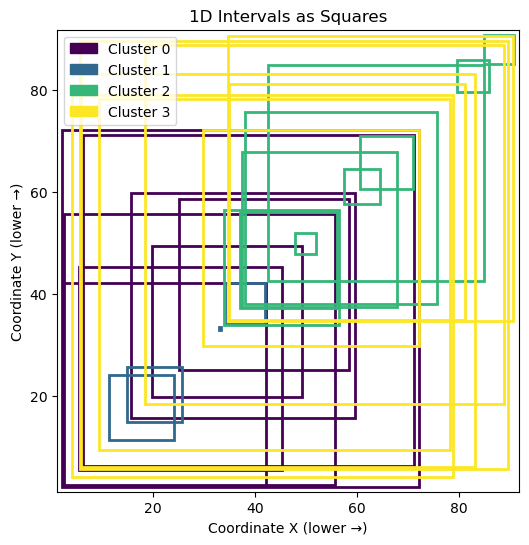

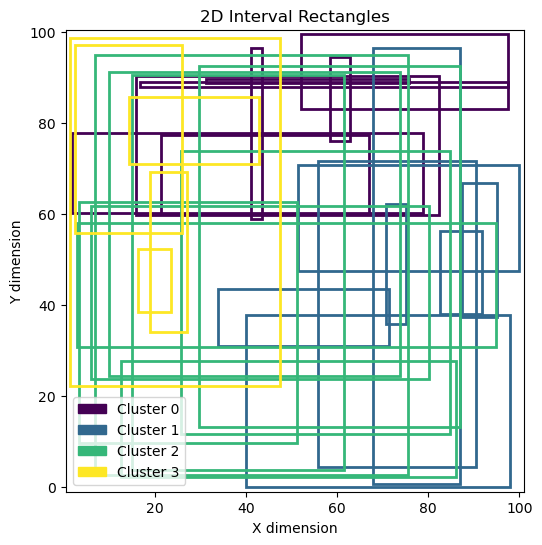

In [13]:
random_data = IntervalData.random_data(30, 1)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_intervals_as_squares(random_data.get_intervals(), model.labels_)

random_data = IntervalData.random_data(30, 2)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper
0         13.023673        14.831114         8.781230        21.668003
1         13.244557        63.047557        50.549718        82.683161
2         35.250640        57.564881         0.594725        52.935903
3          5.038612         6.414630        31.289126        59.366434
4         29.559932        41.789174        29.966799        95.256878
5         92.360964        93.525105        29.479395        56.024978
6         59.705559        64.647971         4.417913        96.167814
7         31.710231        91.439200        26.468141        69.028978
8         33.594262        75.307937        57.904673        94.469666
9         42.487600        78.384379        47.917558        78.085706
10        18.097185        44.986055        38.647135        49.488842
11        64.799343        93.480325        16.040984        53.362567
12         2.423649        16.595849         4.968061

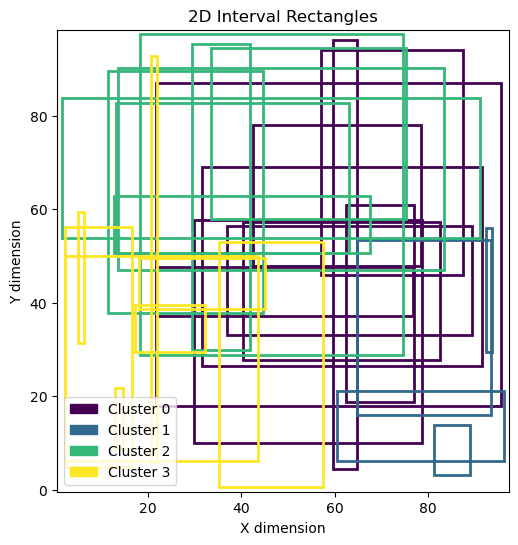

In [14]:
random_data = IntervalData.random_data(30, 2)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)